In [2]:
from sympy import *
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import statistics
from fractions import Fraction
mc =40.0*1.66e-27 #calcium
mh=44.0*1.66e-27
kb = 1.380e-23 #ボルツマン定数
Tk = 500e-6 # 
T = 500   #初期温度
d=8 #deg#rotating angle
rad=(d/180)*2*pi #radian
vy0=(kb*T/mc)**0.5*10e-3 #初期速度
#vy = (kb*Tk/m)**0.5 #イオンが振動している速さ
wy = 2*pi*400e3 #y方向の永年周波数
#レーザー冷却項に必要な定数
hbar = 1.054e-34 #J.s
h = 2*pi*hbar
c = 3.0e8
Gamma=2*pi*20.7e6   #Hz
tau=1/Gamma #寿命


lamda = 397e-9 #nm,冷却レーザーの波長
delta=2*pi*10e6   #detuning#Hz#delta-omega
k=2*pi/lamda
dg = -0.5 #δ/Γ
I = 50e-6/(pi*(100e-6)**2)
Isat = (pi/3)*(h*c)/(tau*lamda**3)
s=Ir=0.5
a = (4*hbar*k**2)*Ir*(-2*dg)/((1+(2*dg)**2)**2)/mc
y0=-50e-6
wh= 2*pi*400e3
wc= 2*pi*400e3

e=1.6021e-19 #C
F=e**2/(4*pi)
epsilon0=8.854e-12  #[F/m]
whx=wcx=2*np.pi*1000e3
why=wcy= 2*np.pi*1000e3
whz=wcz=2*np.pi*500e3
whx

6283185.307179586

In [3]:
#equilibrium distanve

X=2*np.pi*epsilon0*mh*whx**2
Y=2*np.pi*epsilon0*mh*why**2
Z=2*np.pi*epsilon0*mh*whz**2

#d_calc=np.cbrt(e**2/(2*np.pi*epsilon0*mh*omega**2)

dx=(e**2/X)**(1/3)
print(dx) #minimum distance
dy=(e**2/Y)**(1/3)
print(dy) #minimum distanced
dz=(e**2/Z)**(1/3)
print(dz) #minimum distance


5.428915948338335e-06
5.428915948338335e-06
8.617866887439209e-06


In [4]:
#minimum distance energy #C^2/F=C.V
E_dx=e**2/(4*np.pi*epsilon0*dx)
print(E_dx)
E_dy=e**2/(4*np.pi*epsilon0*dy)
print(E_dy)
E_dz=e**2/(4*np.pi*epsilon0*dz)
print(E_dz)
#E_d=e**2/(4*np.pi*epsilon0*(dz**2+dy**2+dx**2)**(1/2))
E_d=E_dx
print(E_d)

4.2492936206607094e-23
4.2492936206607094e-23
2.676887239927213e-23
4.2492936206607094e-23


In [5]:
V=(10,100,10)
R=(0,-30e-6,10e-6)
T=mh*(V[0]**2+V[1]**2+V[2]**2)/(2*e)
U=0.04  #eV
E0=T+U
E0x=0.001*e
E0y=0.038*e
E0z=0.001*e
print(E0x/E_dx)
print(E0y/E_dy)
print(E0z/E_dz)
print("T=",T)
print("U=",U)

3.770273704340757
143.27040076494876
5.98493644447856
T= 0.0023250983084701325
U= 0.04


In [6]:
#Energy


taux=2*np.pi/whx
def Ex(t,E0x,E_dx) :
    E_t=np.zeros(len(t))
    for i in range(len(t)):
        E_t[0]=E0x/E_dx
        E_t[i]=(E0x/E_dx)**3-(t[i]/taux)*24*mh/mc
        if E_t[i] >=0:
            E_t[i]=E_t[i]**(1/3)
        else :
            E_t[i]=-10
    return E_t
print(E0x/E_d)

tauy=2*np.pi/why
def Ey(t,E0y,E_dy) :
    E_t=np.zeros(len(t))
    for i in range(len(t)):
        E_t[0]=E0y/E_dy
        E_t[i]=(E0y/E_dy)**3-(t[i]/tauy)*24*mh/mc
        if E_t[i] >=0:
            E_t[i]=E_t[i]**(1/3)
        else :
            E_t[i]=-10
    return E_t
print(E0y/E_d)

tauz=2*np.pi/whz
def Ez(t,E0z,E_dz) :
    E_t=np.zeros(len(t))
    for i in range(len(t)):
        E_t[0]=E0z/E_dz
        E_t[i]=(E0z/E_dz)**3-(t[i]/tauz)*24*mh/mc
        if E_t[i] >=0:
            E_t[i]=E_t[i]**(1/3)
        else :
            E_t[i]=-10
    return E_t
print(E0z/E_d)

3.770273704340757
143.27040076494876
3.770273704340757


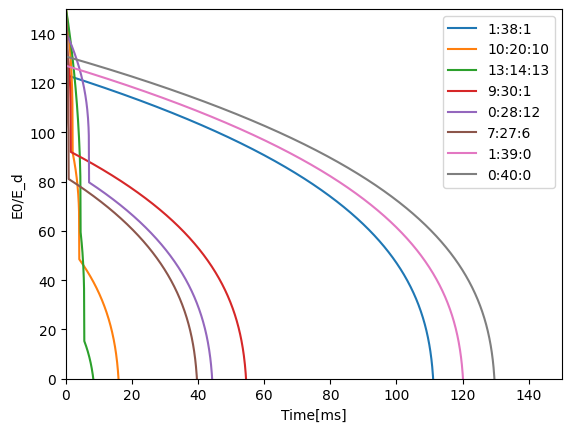

In [7]:
t=np.linspace(0, 0.8,10000)
Ex_1 = Ex(t,E0x,E_d)
Ey_1 = Ey(t,E0y,E_d)
Ez_1 = Ez(t,E0z,E_d)
fig, ax = plt.subplots()
#ax.plot(t, Ex) 
#ax.plot(t, Ey) 
#ax.plot(t, Ez) 
E1=Ex(t,0.001*e,E_d)+Ey(t,0.038*e,E_d)+Ez(t,0.001*e,E_d)
ax.plot(t*10**3,E1,label='1:38:1')
E2=Ex(t,0.01*e,E_d)+Ey(t,0.02*e,E_d)+Ez(t,0.01*e,E_d)
ax.plot(t*10**3,E2,label='10:20:10')
E3=Ex(t,0.013*e,E_d)+Ey(t,0.014*e,E_d)+Ez(t,0.013*e,E_d)
ax.plot(t*10**3,E3,label='13:14:13')
E4=Ex(t,0.009*e,E_d)+Ey(t,0.03*e,E_d)+Ez(t,0.001*e,E_d)
ax.plot(t*10**3,E4,label='9:30:1')
E5=Ex(t,0*e,E_d)+Ey(t,0.028*e,E_d)+Ez(t,0.012*e,E_d)
ax.plot(t*10**3,E5,label='0:28:12')
E6=Ex(t,0.007*e,E_d)+Ey(t,0.027*e,E_d)+Ez(t,0.006*e,E_d)
ax.plot(t*10**3,E6,label='7:27:6')
#E7=Ex(t,0*e,E_d)+Ey(t,0.039*e,E_d)+Ez(t,0.001*e,E_d)
#ax.plot(t*10**3,E7,label='0:39:1')
E8=Ex(t,0.001*e,E_d)+Ey(t,0.039*e,E_d)+Ez(t,0*e,E_d)
ax.plot(t*10**3,E8,label='1:39:0')
E9=Ex(t,0*e,E_d)+Ey(t,0.04*e,E_d)+Ez(t,0*e,E_d)
ax.plot(t*10**3,E9,label='0:40:0')
ax.set_ylim(0,150)
ax.set_xlim(0,150)
ax.set_xlabel('Time[ms]') 
ax.set_ylabel('E0/E_d') 
ax.legend() 
plt.show() 


In [9]:
Ez(t,E0z,E_dz)

array([  3.7702737, -10.       , -10.       , ..., -10.       ,
       -10.       , -10.       ])

In [164]:
E_t=E[1]**3-(t[2]/tau)*24*mh/mc*(E_d**3)
if E_t >=0:
    E_t=E_t**(1/3)
else :
    E_t=0
E_t

3.7184563568792935e-20

In [201]:
E0=0.1*e
tau=2*np.pi/why
M=mc/(24*mh)
tau_c=M*tau*(E0/E_d)**3
tau_c

31.718698992792802

In [29]:
v=350
E=mh*v**2/2
E/e

0.027923974783097185

In [30]:
E0=0.04*e#eV
T=E0/(3*kb)
T

154.79227053140096

In [35]:
mh*350**2/(2*e)  #E[eV]

0.027923974783097185

In [217]:
(3*kb*4000)/e   #[eV]

1.0336433431121652

In [80]:
V=(10,100,10)
Ex=mh*V[0]**2/(2*e)
Ey=mh*V[1]**2/(2*e)
Ez=mh*V[2]**2/(2*e)
Ey

0.0022795081455589537

In [97]:
Lx=50e-6*10*mh
Ly=50e-6*100*mh
Lz=50e-6*10*mh
print(Lx)
print(Ly)
print(Lz)

3.652e-29
3.6519999999999997e-28
3.652e-29


In [99]:
mh*V[0]**2/(whx*2) #Ex/wx

1.2916307826035596e-30

In [92]:
mh*V[1]**2/(why*2)  #Ey/wy

1.4530846304290044e-28

In [93]:
mh*V[2]**2/(whz*2)   #Ez/wz

1.1624677043432037e-29

0.002284074009503953
T= 8.83892504982194


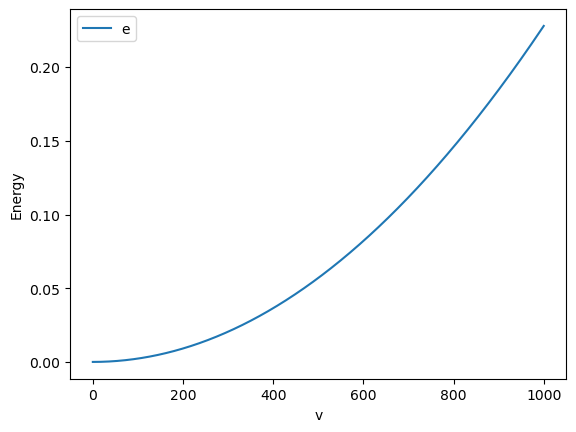

In [233]:
v=np.linspace(0,1000,1000)
def motion_energy(v,x):
    Em=np.zeros(len(v))
    for i in range(len(v)):
        Em[i]=mh*v[i]**2/(2*e)
        if i == x:
            print(Em[i])
            print('T=',(Em[i]*e)/(3*kb))
    return Em

def temp(E):
    T=np.zeros(len(E))
    for i in range(len(E)):
        T[i]=(E[i]*e)/kb
    return T

Em=motion_energy(v,100)
Tlist=temp(Em)
fig, ax = plt.subplots()
ax.plot(v, Em) 
#ax.plot(Tlist,Em)
ax.set_xlabel('v') 
ax.set_ylabel('Energy') 
ax.legend("eV")  
plt.show()    


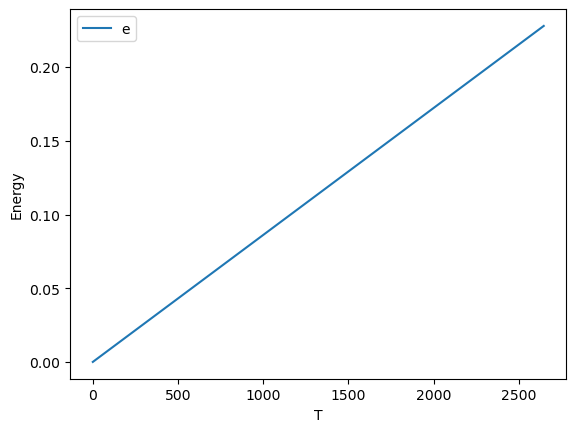

In [235]:
fig, ax = plt.subplots() 
ax.plot(Tlist,Em)
ax.set_xlabel('T') 
ax.set_ylabel('Energy') 
ax.legend("eV")  
plt.show()    

In [243]:
tt=np.linspace(0, 300000,10000000)
tt

array([0.0000000e+00, 3.0000003e-02, 6.0000006e-02, ..., 2.9999994e+05,
       2.9999997e+05, 3.0000000e+05])

In [266]:
whx=wcx=2*np.pi*4500e3
why=wcy= 2*np.pi*4000e3
whz=wcz=2*np.pi*200e3
(whz*10e-6)**2/2

78.95683520871486

In [340]:
mh*10**-2/e

4.559016291117907e-09

In [ ]:
E=